In [1]:
import os
import numpy as np
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(fig, save_file):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [3]:
df = pd.read_excel("../data/Power calculation 2021 grant.xlsx", sheet_name=2, skiprows=1).iloc[:, 7:]

In [4]:
plot_df = df.rename(columns={"Sample size.1":"samples"}).melt(id_vars=["samples"], value_vars=["Coding (LGD)", "CNV", "Promoter", "Enhancer",	"Autism gene", "STR"], var_name="variant_type", value_name="power")

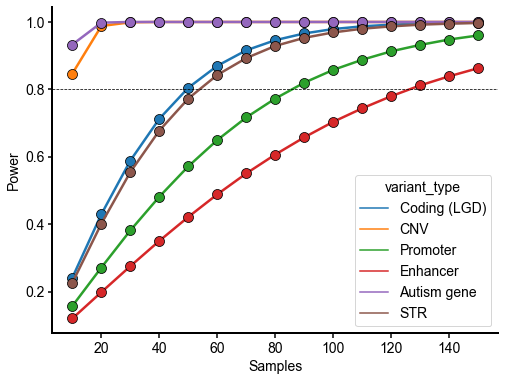

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

sns.lineplot(
    data=plot_df,
    x="samples",
    y="power",
    hue="variant_type",
    marker="o",
    markeredgecolor="k",
    markersize=10,
    linewidth=2.5,
    ax=ax
)


ax.spines[['right', 'top']].set_visible(False)
# ax.set_xticks(range(0, 10), range(1, 11))
ax.set_xlabel(f"Samples")
ax.set_ylabel(f"Power")
ax.axhline(0.8, color="k", linestyle="dashed", linewidth=0.75)

In [6]:
save_file = "../data/figures/rare_burden.pdf"
save_pdf(fig, save_file)